In [1]:
import numpy as np
import matplotlib.pyplot as plt
from entidades.SimulatedPhoton import SimulatedPhoton
from utilidades.optica import reflect, refract
from entidades.estructura import Esfera

# Reflexión y refracción

In [2]:
foton1 = SimulatedPhoton(1, dire = np.array([0, 1, 0]))
n = np.array([1, -1, 0])
# Normaliza n con numpy
n = n / np.linalg.norm(n)
print(n)
print(foton1.dire)
refl_dir = reflect(foton1.dire, n)
print(np.arccos(np.dot(refl_dir, n)))
trans_dir = refract(foton1.dire, n, 1, 2)
print(trans_dir)
print(np.arccos(np.dot(trans_dir, -n)))

[ 0.70710678 -0.70710678  0.        ]
[0. 1. 0.]
0.7853981633974487
[-0.41143783  0.91143783  0.        ]
0.36136712390670817


# Estructuras

In [3]:
def dibujar_interseccion_esfera_foton(esfera, foton):
  interseccion, n = esfera.interseccion(foton)
  # Dibujamos la esfera
  x, y = esfera.getPlotCoords()
  plt.plot(x, y)
  plt.xlim(-2,2)
  plt.ylim(0,4)

  # Dibujar origen y vector de direccion
  plt.scatter(foton.pos[0], foton.pos[1], c='b')
  plt.quiver(foton.pos[0], foton.pos[1],
            foton.dire[0], foton.dire[1], color='b')
  plt.quiver(interseccion[0], interseccion[1], n[0], n[1], color='g')
  plt.axis('equal')
  

  # Dibujamos segmento de trayectoria
  plt.plot([foton.pos[0], interseccion[0]], [foton.pos[1], interseccion[1]], c='b')

  plt.scatter(interseccion[0], interseccion[1], c='r')
  # plt.scatter(interseccion_2[0], interseccion_2[1], c='r')
  plt.show()

In [4]:
# Generamos una esfera de radio 0.5 y centro en el 1, 1
f_dentro = SimulatedPhoton(1, pos = np.array([0, 1.2, 0]), dire = np.array([0, 1, 0]), spa = 1)
f_fuera = SimulatedPhoton(2, pos = np.array([0, 0.8, 0]), dire = np.array([0, 1, 0]), spa = 0)
f_fuera_2 = SimulatedPhoton(3, pos = np.array([0, 0.8, 0]), dire = np.array([0, -1, 0]), spa = 0)
esfera = Esfera(np.array([0, 2, 0]), 1)

print(f_dentro)
print(f_fuera)
print(esfera)

Fotón con id 1 en posición [0.  1.2 0. ] y dirección [0. 1. 0.]
Fotón con id 2 en posición [0.  0.8 0. ] y dirección [0. 1. 0.]
Esfera con centro [0 2 0], radio 1 y Material con Índice de refracción constante: 1.5


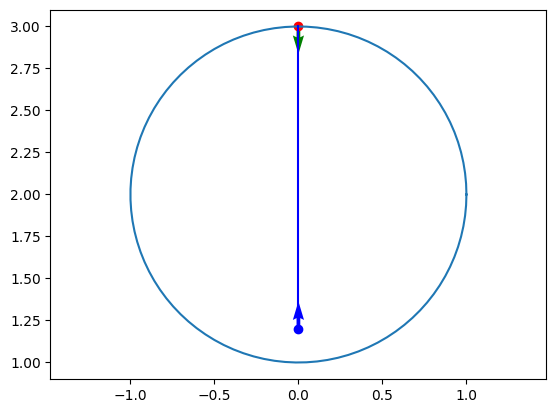

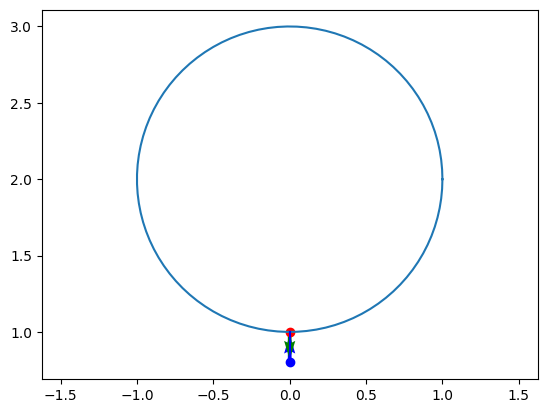

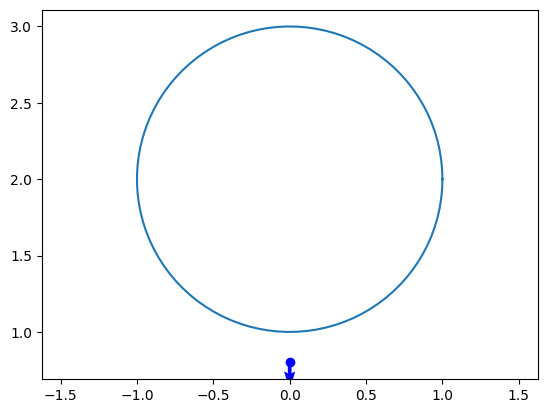

In [5]:
dibujar_interseccion_esfera_foton(esfera, f_dentro)
dibujar_interseccion_esfera_foton(esfera, f_fuera)
dibujar_interseccion_esfera_foton(esfera, f_fuera_2)

In [6]:
# Como tiene indice de regracción constante
# no cambia con la frecuencia
esfera.material.indice_refraccion.calcular(1000)

1.5

## Interfase

In [7]:
from entidades.interfase import Interfase

# Esfera
centro = np.array([0, 2, 0])
radio = 1
esfera = Esfera(centro, radio)
# Interfase aire esfera
interfase = Interfase(esfera)

# Foton
pos_foton = np.array([0, 0.8, 0])
dire_foton = np.array([1, 1, 0])
foton = SimulatedPhoton(1, pos = pos_foton, dire = dire_foton)

# Obtenemos la intersección
interseccion, n = esfera.interseccion(foton)
print(interseccion, n)

[0.22583426 1.02583426 0.        ] [ 0.22583426 -0.97416574  0.        ]


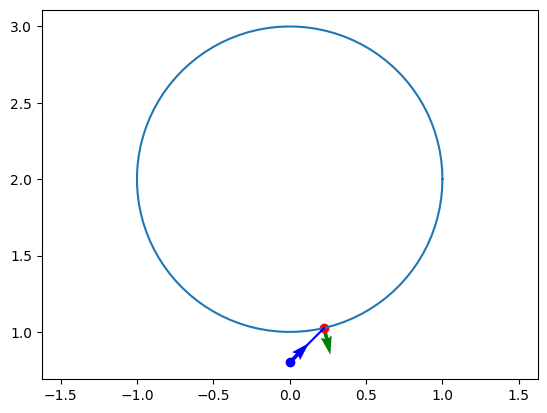

In [8]:
dibujar_interseccion_esfera_foton(esfera, foton)

In [9]:
new_dire_reflect = interfase.reflect(foton, n)
print(new_dire_reflect)
indice_exterior = interfase.indiceExterior()
indice_interior = interfase.indiceInterior()
print(indice_exterior)
print(indice_interior)
new_dire_refract = interfase.refract(foton, n, indice_exterior, indice_interior)
print(new_dire_refract)

[ 0.9461073  -0.32385333  0.        ]
1.0
1.5
[0.36484366 0.9310688  0.        ]


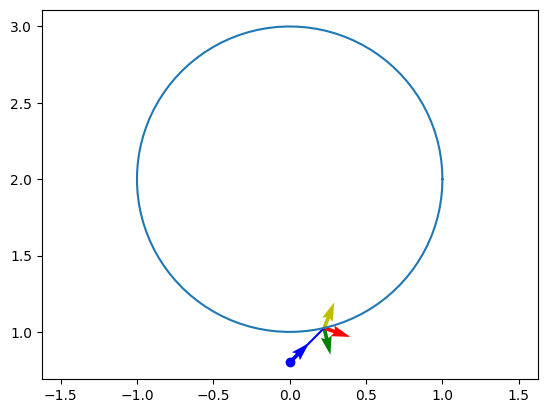

In [10]:
# Dibujamos el conjunto del proceso, junto con la reflexión y refracción
plt.scatter(pos_foton[0], pos_foton[1], c='b')
plt.quiver(pos_foton[0], pos_foton[1], dire_foton[0], dire_foton[1], color='b')

plt.quiver(interseccion[0], interseccion[1], n[0], n[1], color='g')
plt.quiver(interseccion[0], interseccion[1], new_dire_reflect[0], new_dire_reflect[1], color='r')
plt.quiver(interseccion[0], interseccion[1], new_dire_refract[0], new_dire_refract[1], color='y')
plt.plot([pos_foton[0], interseccion[0]], [pos_foton[1], interseccion[1]], c='b')

x_esf, y_esf = esfera.getPlotCoords()
plt.plot(x_esf, y_esf)
plt.xlim(-2,2)
plt.ylim(0,4)
plt.axis('equal')
plt.show()

In [20]:
angulo = np.pi/2
dire_foton = np.array([np.cos(angulo), np.sin(angulo), 0])
foton = SimulatedPhoton(1, pos = pos_foton, dire = dire_foton)
interseccion, n = esfera.interseccion(foton)
new_dire, result = interfase.interactuar(n, foton, verbose = 1)

 ni 1.0, nt 1.5
Ru 0.04000000000000001
tetai 0.0 tetat 0.0
Fotón 1 se refracta.


[1.2246468e-17 1.0000000e+00 0.0000000e+00] [ 1.2246468e-17 -1.0000000e+00  0.0000000e+00]


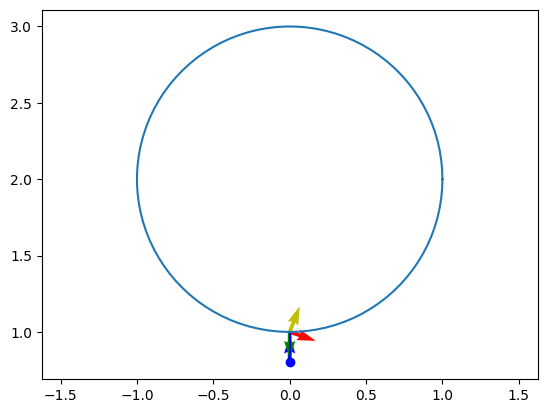

In [21]:
# Obtenemos la intersección
interseccion, n = esfera.interseccion(foton)
print(interseccion, n)
# Dibujamos el conjunto del proceso, junto con la reflexión y refracción
plt.scatter(pos_foton[0], pos_foton[1], c='b')
plt.quiver(pos_foton[0], pos_foton[1], dire_foton[0], dire_foton[1], color='b')

plt.quiver(interseccion[0], interseccion[1], n[0], n[1], color='g')
plt.quiver(interseccion[0], interseccion[1], new_dire_reflect[0], new_dire_reflect[1], color='r')
plt.quiver(interseccion[0], interseccion[1], new_dire_refract[0], new_dire_refract[1], color='y')
plt.plot([pos_foton[0], interseccion[0]], [pos_foton[1], interseccion[1]], c='b')

x_esf, y_esf = esfera.getPlotCoords()
plt.plot(x_esf, y_esf)
plt.xlim(-2,2)
plt.ylim(0,4)
plt.axis('equal')
plt.show()

# Fuente de fotones

In [11]:
from entidades.fuente import FuenteMonocromatica
from utilidades.aleatorios import GenerateRandomNormalAngle, GenerateRandomUniformPosition2D

In [12]:
fuente = FuenteMonocromatica(1000, 0)
fuente_uniforme = FuenteMonocromatica(1000, 0, GenerateRandomUniformPosition2D)
fuente_angulo = FuenteMonocromatica(1000, 0, dispersion_ang=GenerateRandomNormalAngle)

In [13]:
# Para distribución normal usar mean y std
fotones_normal = fuente.emitirN(10000, 0, 5)
# Para uniforme, es entre [mean-std, mean+std]
fotones_uniforme = fuente_uniforme.emitirN(1000, 0, 2.5)
# Para distribución de ángulo, usar los argumentos correspondientes
fotones_angulo = fuente_angulo.emitirN(20, 0, 0, mean_ang=np.pi/2, std_ang=np.pi/4)

In [16]:
print(len(fotones_normal))
print(len(fotones_uniforme))
print(len(fotones_angulo))
for f in fotones_angulo:
  print(f)

10000
1000
20
Fotón con id 1 en posición [0.0, 0, 0] y dirección [0.0582979  0.99829923 0.        ]
Fotón con id 2 en posición [0.0, 0, 0] y dirección [-0.08198461  0.9966336   0.        ]
Fotón con id 3 en posición [0.0, 0, 0] y dirección [-0.5698417   0.82175448  0.        ]
Fotón con id 4 en posición [0.0, 0, 0] y dirección [0.34782454 0.93755965 0.        ]
Fotón con id 5 en posición [0.0, 0, 0] y dirección [-0.70411721  0.71008377  0.        ]
Fotón con id 6 en posición [0.0, 0, 0] y dirección [0.16052067 0.98703248 0.        ]
Fotón con id 7 en posición [0.0, 0, 0] y dirección [0.83767133 0.54617465 0.        ]
Fotón con id 8 en posición [0.0, 0, 0] y dirección [0.56882273 0.82246015 0.        ]
Fotón con id 9 en posición [0.0, 0, 0] y dirección [-0.87360637  0.48663323  0.        ]
Fotón con id 10 en posición [0.0, 0, 0] y dirección [ 0.92781019 -0.37305261  0.        ]
Fotón con id 11 en posición [0.0, 0, 0] y dirección [0.30913246 0.95101899 0.        ]
Fotón con id 12 en posi

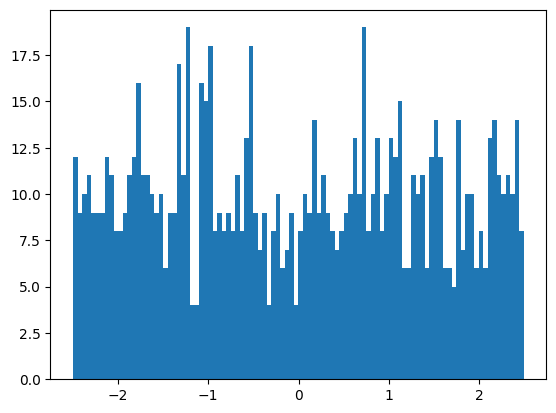

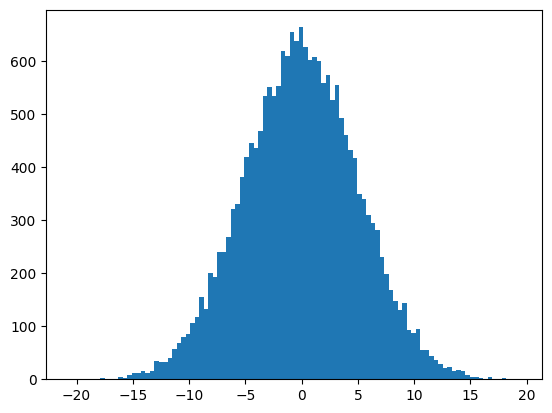

In [26]:
x_pos_uniform = [f.pos[0] for f in fotones_uniforme]
x_pos_normal = [f.pos[0] for f in fotones_normal]
# Histograma de posiciones
plt.hist(x_pos_uniform, bins=100)
plt.show()
plt.hist(x_pos_normal, bins = 100)
plt.show()

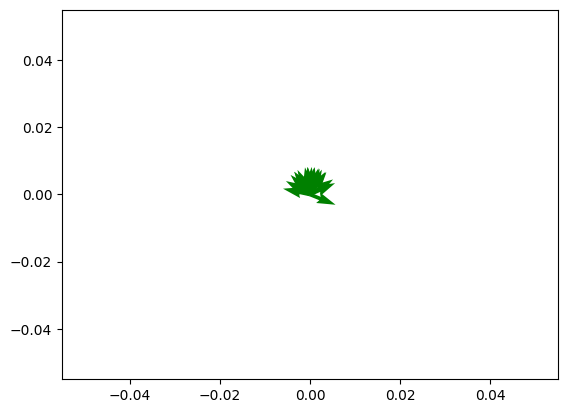

In [17]:
# Dibujamos los vectores de dirección unitarios
for f in fotones_angulo:
  plt.quiver(f.pos[0], f.pos[1], f.dire[0], f.dire[1], color='g')
plt.show()